<center><h1>Vroom Vroom How Much?</h1></center>

    
<p>In this continuous assigment I will try to recommend how much you should sell your car for in Sri Lanka!<p>
    

We will import our libraries

In [1]:
import pandas as pd
import numpy as np
from seaborn import scatterplot
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.ensemble import VotingRegressor
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

from joblib import dump

Use pandas to read the CSV file into a DataFrame

In [2]:
df = pd.read_csv("dataset_vehicles.csv")

<h1>Data set inspection</h1>

Now that we read our data, it is time to analyze it. As we can see, we have 18938 entries each having 19 features. So on first glance this seams to be a pretty decently sized data set.

In [3]:
# The dimensions
df.shape

(18938, 19)

Lets take a closer look at our features, what they are, what type of data type they are represented in, how complete or incomplete they are.

In [4]:
# The datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18938 entries, 0 to 18937
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Title           18938 non-null  object
 1   Sub_title       18938 non-null  object
 2   Price           18938 non-null  object
 3   Brand           18938 non-null  object
 4   Model           18938 non-null  object
 5   Edition         13908 non-null  object
 6   Year            18938 non-null  int64 
 7   Condition       18938 non-null  object
 8   Transmission    18938 non-null  object
 9   Body            17043 non-null  object
 10  Fuel            18938 non-null  object
 11  Capacity        18938 non-null  object
 12  Mileage         18938 non-null  object
 13  Location        18938 non-null  object
 14  Description     18938 non-null  object
 15  Post_URL        18938 non-null  object
 16  Seller_name     18938 non-null  object
 17  Seller_type     18938 non-null  object
 18  publis

Wow! We can see that most of our features are of <b>type object</b>. On first look, some of the features also seam to be rather useless in our case, such as <b>Seller_name</b> (there is no reason why a persons name should affect the value for his car), <b>Post_URL</b>, <b>Location</b> (seeing as Sri Lanka is a rather small country the prices should not vary as much such as in a larger country like USA for example). We will continue analyzing our data set and come back to what we will keep and what we will throw out.

In [5]:
# Summary statistics
df.describe(include="all") 

,Title,Sub_title,Price,Brand,Model,Edition,Year,Condition,Transmission,Body,Fuel,Capacity,Mileage,Location,Description,Post_URL,Seller_name,Seller_type,published_date
count,18938,18938,18938,18938,18938,13908,18938.000000,18938,18938,17043,18938,18938,18938,18938,18938,18938,18938,18938,18938
unique,10329,17014,1831,57,516,6336,NaN,3,4,7,6,432,3850,198,17075,17911,6103,1,15060
top,Suzuki Alto 2015 for sale,"Posted on 03 Mar 11:21 am, Colombo 3, Colombo","Rs 650,000",Toyota,Alto,G Grade,NaN,Used,Automatic,Hatchback,Petrol,"1,500 cc","100,000 km","Kohuwala, Colombo",* Leasing can be arranged with your requiremen...,https://ikman.lk/en/ad/toyota-pixis-g-intelige...,LB Finance PLC,Premium-Member,2021-03-03 11:21:00
freq,184,63,92,5762,962,172,NaN,17991,11412,6712,13823,3861,450,1333,151,4,512,18938,69
mean,NaN,NaN,NaN,NaN,NaN,NaN,2007.718344,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,11.640139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,1927.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2003.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,2012.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,2016.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df['Seller_type'].unique()

array(['Premium-Member'], dtype=object)

<h1>Feature selection</h1>

Lets take a look at the raw data. If we look closely we can see that we have redundant data:

<b>Title</b>

This is formed by : Brand + Model + Edition + Year, thus it is redundant.

<b>Sub_title</b>

This is formed by : publish_date + Location, thus it is redundant.

<b>Seller_name </b>

This does not directly influence that final sale price of the car. It actualy could cause more harm then good by discriminating people based on their names.

<b>Post_URL</b>

This feature does not provide any usefull information on the car.

<b> Location </b>

As mentioned above, Sri Lanka is a rather small country so the prices should not vary as much such as in a larger country like USA for example.

<b>publish_date</b>

This feature could have been usefull if we would have known when the car would have sold, because then we could have seen how relevent the price was (Bad price -> car stays online for much longer). Since we only have the publish date I will choose to remove it as a feature.

<b>Seller_type</b>

If we look at the data set, we only have one type of seller type, which is "Premium-Member", this clearly does not help us so we will also remove it.

<b>Description</b>

This feature could actully be really usefull (contains a lot of info), but I do not possess the knowledge to turn it into usefull data.

Now that we identified the features that we dont need, we can remove them.


In [7]:
#We will remove the "Description" later on, because we will use it for data filtration.
df.drop(columns = ["Sub_title","Title","Seller_name","Post_URL","Location","published_date","Seller_type"], inplace = True)

In [8]:
# Summary statistics
df.describe(include="all") 

,Price,Brand,Model,Edition,Year,Condition,Transmission,Body,Fuel,Capacity,Mileage,Description
count,18938,18938,18938,13908,18938.000000,18938,18938,17043,18938,18938,18938,18938
unique,1831,57,516,6336,NaN,3,4,7,6,432,3850,17075
top,"Rs 650,000",Toyota,Alto,G Grade,NaN,Used,Automatic,Hatchback,Petrol,"1,500 cc","100,000 km",* Leasing can be arranged with your requiremen...
freq,92,5762,962,172,NaN,17991,11412,6712,13823,3861,450,151
mean,NaN,NaN,NaN,NaN,2007.718344,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,11.640139,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1927.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,2003.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,2012.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,2016.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<h1>Data representation</h1>

Now that we reduced our features to the ones that interest us, its time to turn them into a usable representation. 

<b>Price</b>

We will start of with the price, we can see that the data is of type <b>object</b> but it actually should be a <b>number</b>, lets fix that.

In [9]:
df['Price'] = df['Price'].str.replace('Rs','')
df['Price'] = df['Price'].str.replace(',','')
df['Price'] = df['Price'].str.replace(' ','')

In [10]:
df["Price"] = df["Price"].astype(int)
df.reset_index(drop=True, inplace=True)

In [11]:
df['Price']

0         2795000
1        11500000
2         3300000
3         4450000
4         2173000
           ...   
18933      420000
18934     3775000
18935    38700000
18936    10850000
18937     4890000
Name: Price, Length: 18938, dtype: int32

<b>Capacity</b>

Moving on to the next feature, capacity. Here we have the same issue as before, bad data representation, so lets fix that.

In [12]:
df['Capacity'] = df['Capacity'].str.replace('cc','')
df['Capacity'] = df['Capacity'].str.replace(',','')
df['Capacity'] = df['Capacity'].str.replace(' ','')

In [13]:
df["Capacity"] = df["Capacity"].astype(int)
df.reset_index(drop=True, inplace=True)

In [14]:
df['Capacity']

0        1000
1        2000
2        1300
3        1500
4        1000
         ... 
18933    1300
18934     650
18935    4500
18936    3000
18937    1000
Name: Capacity, Length: 18938, dtype: int32

<b>Mileage</b>

Moving on to the last feature, mileage. Again we have bad data representation, so lets fix that.

In [15]:
df['Mileage'] = df['Mileage'].str.replace('km','')
df['Mileage'] = df['Mileage'].str.replace(',','')
df['Mileage'] = df['Mileage'].str.replace(' ','')

In [16]:
df["Mileage"] = df["Mileage"].astype(int)
df.reset_index(drop=True, inplace=True)

In [17]:
df['Mileage']

0         14000
1         27000
2        150000
3        124000
4         15800
          ...  
18933     98000
18934     34200
18935     39000
18936     47000
18937     18154
Name: Mileage, Length: 18938, dtype: int32

<h1>Data Cleanup</h1>

Now that we got our data in the correct formats, it is time to clean it up!

<b>Price</b>

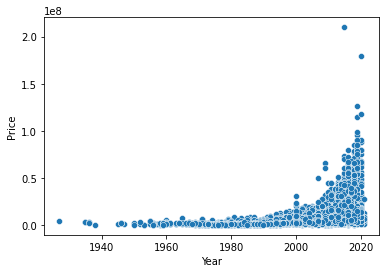

In [18]:
plot = scatterplot(x="Year", y="Price", data=df)

It is very clear form the first plot that there are a few cars that stand out from the price point of view, lets take a closer look, maybe they are some very special cars.

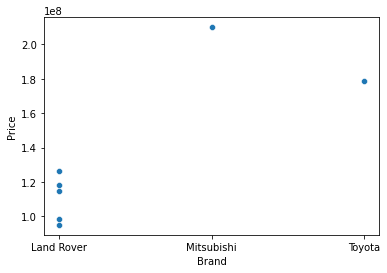

In [19]:
plot = scatterplot(x="Brand", y="Price", data=df[df.Price > 90000000])

This is very odd, if we look at the brands of the cars, they don't seam to be anything special, keep in mind the cars we are plotting here all cost > 386 760.76 euro. Lets look at the descriptions maybe they have some custom work done to them, or are some special edition.

In [20]:
pd.set_option('display.max_colwidth', None)
df[df.Price > 90000000]['Description']

1280     Range Rover SV Autobiography Fully LoadedHighest Customized Spec in the country...* Hand made by "special vehicle operations"* Pixel-laser LED headlights with signature DRL* Champagne celler * Comfort Plus Seats * Executive Lounge* 4 Way 360 Bird View 3D Camera* Signature Sound System*  Hood Full Upholstery Black Leather* Soft close doors with Rear auto close doors* Electrically  deployable workstations  * Electrically deployable side steps* Meridian Signature sounds system with 3D rear entertainment* WhiteFireÂ®ï¸ Headphones* SV unique digital display & Head-Up Display* Laminated Front & Laminated Privacy Rear Side Glass* "21" Style 7001, 7 split-spoke, Gloss Light Silver with contrast Diamond Turned finish* 24-way heated and cooled, enhanced massage front seats with fixed Centre console Executive Class Comfort-Plus rear seats* Illuminated Tread-plate* First and second row Smoker's Pack* Wood and Leather Steering Wheel* Wireless Phone Charging Cupholder* Activity Key* Cabin 

Once we read the descriptions for some of the cars (mainly the Range Rovers) we can find some very intresting information. Most of the expensive cars have work done that is hand made, and all seam to have very special options, like a Champagne celler. However, the other cars that are above 1.4 don't seem to have a description that explains the price, so we will remove all the cars that are above 1.4.

In [21]:
df = df[df.Price < 140000000]
df.reset_index(drop=True, inplace=True)

Lets now take a look at all the cars that are priced really low.

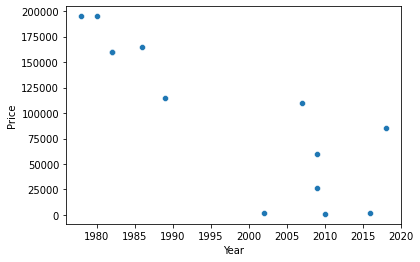

In [22]:
plot = scatterplot(x="Year", y="Price", data=df[df.Price < 200000])

If we take a look at the description of the cars that are below 200000 Rs, we can see that some are ads for renting, others are just car parts... Thus they are not good for our data set.

In [23]:
df[(df.Price < 200000)]['Description']

970      A/CAir BagsCD SetupCentral LockingMP3Power MirrorsPower ShuttersPower SteeringRemote C / LockRetractable MirrorsReverse CameraUSBà¶¶à¶½à·à¶à·à¶±à¶ºà·... à¶à·à·à·à¶±à· à·à·à·à¶±à¶ºà¶à· à¶à¶­à·à¶­à¶­à· à¶½à·à¶ºà¶à·à¶ºà·à·à¶½à· à¶±à·à¶»à·à·à¶½à·à¶¯à¶ºà· à·à·à¶³à¶§ à¶¶à¶½à¶±à·à¶±. à¶
à·à·à¶¯à· à¶½à·à¶à¶±à¶à¶­ à·à·à·à¶±à¶ºà¶à·à¶¯, à¶´à·à·à¶»à·à¶¸à¶§ à·à·à¶»à·à¶°à¶­à· à¶à·à¶±à·à¶à¶» à¶­à·à¶¶à·à¶¯, à¶´à·à¶» à¶
à¶ºà·à¶­à·à¶à¶»à·à·à¶±à· à¶
à¶­à¶» à¶»à¶à·à·à¶« à·à¶¸à·à¶à¶¸à·à·à¶½ à¶±à·à¶¸ à¶­à·à¶¶à·à¶±à·à¶¯, à¶±à·à¶à·à·à· à¶¶à¶¯à·, à¶´à·à¶» à¶¯à¶© à¶à¶¯à·à¶º à¶à·à·à·à¶¸à¶§ à¶­à·à¶¶à·à¶¯, à·à·à¶±à¶­à· à¶±à·à¶­à·à¶¸à¶º à¶à·à¶§à·
à· à·à·à·à¶­ à·à·à·à¶±à¶ºà¶à·à¶¯, à¶à¶¶ à¶
à¶­à¶§ à¶½à·à¶¶à·à¶±à·à¶±à· à·à·âà¶ºà¶¢ à¶½à·à¶ºà·à¶´à¶¯à·à¶à¶ à· à·à·à¶­à·à¶à¶ºà¶à·à¶¯... à¶¸à· à·à·à¶ºà¶½à·à¶½ à¶±à·à·à·à¶»à¶¯à·à·à¶¸ à¶´à¶»à·à¶à·à·à· à¶à¶» à¶¶à¶½à· à·à·à¶³ à·à

Once we increse the price to <b>250000 Rs</b>, we start to get actual cars for sale!

In [24]:
df[(df.Price < 300000) & (df.Price >= 250000)]['Description']

773                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

Now that we found a good price range for the true car ads, we have to remove the ones that are not good, I remove anything below 250000 Rs.

In [25]:
df = df[df.Price >= 250000]
df.reset_index(drop=True, inplace=True)

<b>Year</b>

Lets take a look at the year now.

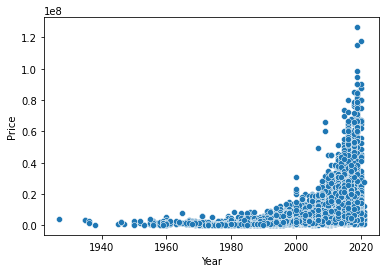

In [26]:
plot = scatterplot(x="Year", y="Price", data=df)

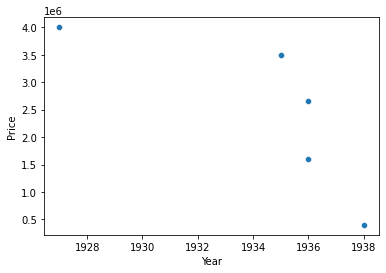

In [27]:
plot = scatterplot(x="Year", y="Price", data=df[df.Year < 1940])

The years that are in the dataset seam to be perfectly plausible, so we will not touch this feature.

<b>Capacity</b>

On to the next feature, capacity.

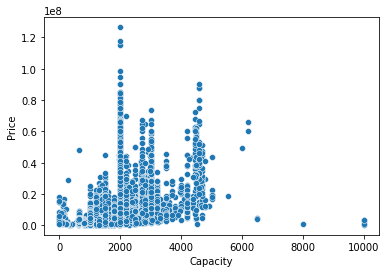

In [28]:
plot = scatterplot(x="Capacity", y="Price", data=df)

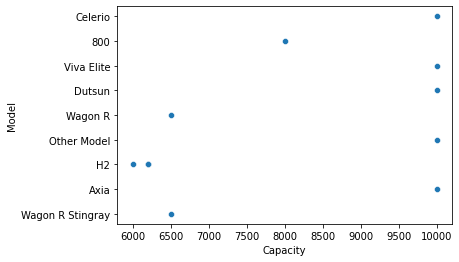

In [29]:
plot = scatterplot(x="Capacity", y="Model", data=df[df.Capacity >= 6000])

After some quick googling, we find that all the cars above 6L, are lying. For example the Wagon R from Suzuki, has a 660cc engine, not a 6.5L (clearly an input mistake from the seller). We will remove all the cars above 6L.

In [30]:
df = df[df.Capacity <= 6000]
df.reset_index(drop=True, inplace=True)

Lets take a look now at all the cars that have a very small capacity. We will remove the cars that are electric, since they don't have an engine.

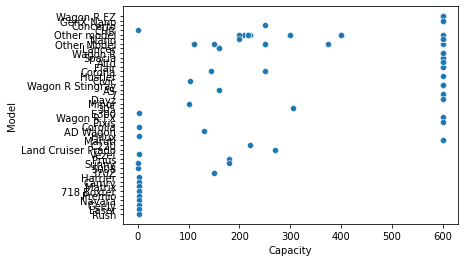

In [31]:
plot = scatterplot(x="Capacity", y="Model", data=df[(df.Capacity <= 600) & (df.Fuel != 'Electric')])

After some googling, we come to the conclusion that all the cars below 600cc, are bad inputs, so we can remove them.

In [32]:
df = df.drop(df[(df.Capacity < 600) & (df.Fuel != 'Electric')].index)
df.reset_index(drop=True, inplace=True)

Lets take a look at the electric cars now. They should have a capacity of 0cc, because they do not have an engine! 

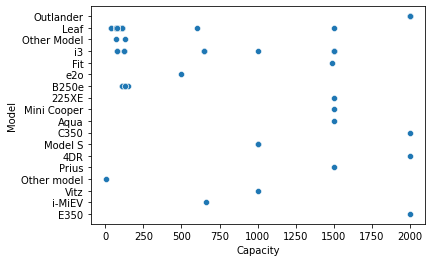

In [33]:
plot = scatterplot(x="Capacity", y="Model", data=df[ (df.Fuel == 'Electric')])

Well that doesn't look right! We will fix it by setting the capactiy of all the Electric cars to 0.

In [34]:
df['Capacity'] = np.where(df['Fuel'] == 'Electric', 0, df['Capacity'])

<b>Mileage</b>

 Lets now take a look at our last numerical feature, mileage.

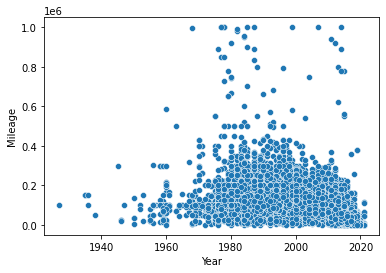

In [35]:
plot = scatterplot(x="Year", y="Mileage", data=df)

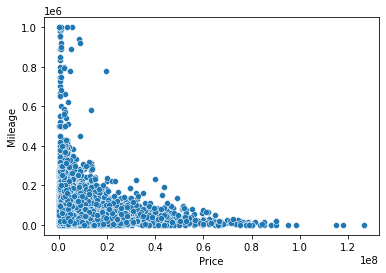

In [36]:
plot = scatterplot(x="Price", y="Mileage", data=df)

For this feature I tried to see if I could find any analytics on google regarding how much people in Sri Lanka drive however I could not find anything useful. Seeing as I don't have any friends from Sri Lanka that I could ask about this topic, I will have to give an educated guess. In general people drive around 15-20k pre year, however there are people who also drive for a living, such as taxi's. Those people drive alot more then 20k per year. In order to capture both of these driving styles and remove the ones that seam far fetched, I will estimate that a car can be driven maximum around 50k per year. For the first year a car usually is driven less because it has to go through a break in period.

In [37]:
df = df.drop(df[(df.Mileage > 20000) & (df.Year == 2020)].index)
df = df.drop(df[(df.Mileage > 55000) & (df.Year == 2019)].index)
df = df.drop(df[(df.Mileage > 100000) & (df.Year == 2018)].index) 
df = df.drop(df[(df.Mileage > 100000) & (df.Year == 2018)].index) 
df = df.drop(df[(df.Mileage > 150000) & (df.Year == 2017)].index) 
df = df.drop(df[(df.Mileage > 200000) & (df.Year == 2016)].index)  
df = df.drop(df[(df.Mileage > 250000) & (df.Year == 2015)].index)  
df = df.drop(df[(df.Mileage > 300000) & (df.Year == 2014)].index) 
df = df.drop(df[(df.Mileage > 350000) & (df.Year == 2013)].index) 
df = df.drop(df[(df.Mileage > 400000) & (df.Year == 2012)].index) 
df = df.drop(df[(df.Mileage > 400000) & (df.Year == 2012)].index) 
df = df.drop(df[(df.Mileage > 450000) & (df.Year == 2011)].index) 
df = df.drop(df[(df.Mileage > 500000) & (df.Year == 2010)].index) 
df = df.drop(df[((df.Mileage < 10000) | (df.Mileage > 500000)) & (df.Year == 2009)].index)  
df = df.drop(df[((df.Mileage < 10000) | (df.Mileage > 500000)) & (df.Year == 2008)].index)
df = df.drop(df[((df.Mileage < 10000) | (df.Mileage > 500000)) & (df.Year == 2007)].index)
df = df.drop(df[((df.Mileage < 10000) | (df.Mileage > 800000)) & (df.Year < 2007)].index)
df.reset_index(drop=True, inplace=True)

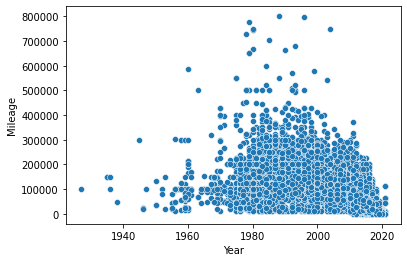

In [38]:
plot = scatterplot(x="Year", y="Mileage", data=df)

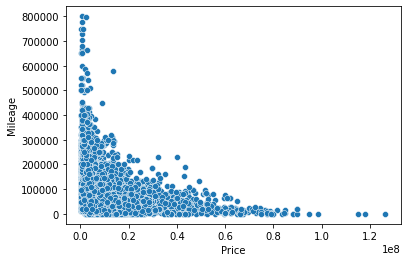

In [39]:
plot = scatterplot(x="Price", y="Mileage", data=df)

In [40]:
# Summary statistics
df.describe(include="all") 

,Price,Brand,Model,Edition,Year,Condition,Transmission,Body,Fuel,Capacity,Mileage,Description
count,1.873300e+04,18733,18733,13743,18733.000000,18733,18733,16870,18733,18733.000000,18733.000000,18733
unique,NaN,57,513,6283,NaN,3,4,7,6,NaN,NaN,16886
top,NaN,Toyota,Alto,G Grade,NaN,Used,Automatic,Hatchback,Petrol,NaN,NaN,* Leasing can be arranged with your requirement* Guarantors not required(T & C Apply)-------------------------------------------------------------------* à¶à¶¶à¶à· à¶ à·à·à·âà¶ºà¶­à·à·à¶º à¶¸à¶­ à¶½à·à·à·à¶ à¶´à·à·à·à¶à¶¸à· à·à·à¶½à·à·à¶º à·à·à¶...* à¶à¶´à¶à¶»à·à·à¶±à· à¶ à·à·à·âà¶º à¶±à·à¶­...(à¶à·à¶±à·à¶¯à·à·à· à·à·à·à¶­à¶ºà·)
freq,NaN,5723,958,172,NaN,17791,11342,6642,13660,NaN,NaN,151
mean,6.416389e+06,NaN,NaN,NaN,2007.779053,NaN,NaN,NaN,NaN,1507.413815,95058.796455,NaN
std,8.370404e+06,NaN,NaN,NaN,11.543330,NaN,NaN,NaN,NaN,721.025439,69137.603345,NaN
min,2.500000e+05,NaN,NaN,NaN,1927.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN
25%,2.265000e+06,NaN,NaN,NaN,2003.000000,NaN,NaN,NaN,NaN,1000.000000,45900.000000,NaN
50%,3.995000e+06,NaN,NaN,NaN,2012.000000,NaN,NaN,NaN,NaN,1495.000000,83000.000000,NaN
75%,6.895000e+06,NaN,NaN,NaN,2016.000000,NaN,NaN,NaN,NaN,1800.000000,130000.000000,NaN


<h2>Nonnumerical values</h2>
    
Lets now take a look at the features that are of type object. We can look here at what type of values we have, how many are unknown and make further decisions such as whether we can exclude some of them.

<b>Brand</b>

We will start of with the brand

In [41]:
df['Brand'].unique()

array(['Micro', 'Toyota', 'Honda', 'Nissan', 'Mercedes Benz',
       'Mitsubishi', 'Mini', 'Daihatsu', 'Ford', 'Kia', 'Suzuki', 'Chery',
       'BMW', 'Land Rover', 'Morris', 'Chevrolet', 'Datsun', 'Mazda',
       'Hyundai', 'Renault', 'Audi', 'Maruti Suzuki', 'Daewoo', 'Zotye',
       'Tata', 'Peugeot', 'Perodua', 'Chrysler', 'Subaru', 'Mahindra',
       'Isuzu', 'Volkswagen', 'MG', 'Austin', 'Jaguar', 'Jeep', 'Lexus',
       'DFSK', 'Ssang Yong', 'Proton', 'Maruti', 'Volvo', 'Porsche',
       'Geely', 'Skoda', 'Alfa Romeo', 'Other brand', 'Fiat', 'Hummer',
       'Opel', 'Citroen', 'Tesla', 'Smart', 'Aston Martin', 'Moto Guzzi',
       'Rover', 'Vauxhall'], dtype=object)

In [42]:
df[df.Brand == 'Other brand'].count()

Price           19
Brand           19
Model           19
Edition         19
Year            19
Condition       19
Transmission    19
Body            17
Fuel            19
Capacity        19
Mileage         19
Description     19
dtype: int64

Looking at the brands, we notice one thats called 'Other brand', looking closer we see that there are only 19 cars of that brand, so to keep things tidy we will remove them.

In [43]:
df = df.drop(df[df.Brand == 'Other brand'].index)
df.reset_index(drop=True, inplace=True)

<b>Model</b>

On to the next feature, the car model.

In [44]:
df['Model'].unique()

array(['Panda', 'GT86', 'IST', 'Allion', 'Vezel', 'Premio', 'Juke',
       'C180', 'Raize', 'Montero', 'Cooper', 'Navara', 'Hilux', 'CHR',
       'Thor', 'Laser', 'CRV', 'Sorento', 'Wagon R Stingray',
       'Land Cruiser Prado', 'Hustler', 'Tiggo', 'E350', 'Sunny',
       'Avanza', 'Alto', 'Mira', 'Swift', '520d', 'Picanto', 'Sylphy',
       'Defender', 'Corolla', 'Civic', 'Minor', 'Aveo', 'Aqua', 'Lancer',
       'Redi Go', 'Maruti', 'Vitz', 'Escudo', 'Mirage', 'Familia', 'Fit',
       'Harrier', 'Tank', 'Axio', 'E200', 'Insight', 'Bluebird', 'Crown',
       'CLA 200', 'Elantra', 'Spacia', 'KWID', 'Q3', 'Santa Fe',
       'Wagon R FZ', 'Starlet', 'C200', 'Wagon R', 'BAIC', 'Ranger',
       'RAV4', 'Discovery', 'Korondo', 'Prius', 'Eon', 'Other Model',
       'Nomad', 'Sportage', 'Cami', 'Freelander', 'Estilo', 'Corsa',
       'A-Star', 'Mini Cooper', 'E300', 'GenX Nano', 'Platz',
       'Land Cruiser Sahara', 'A1', 'Baleno', 'Boon', 'Pajero', 'RX',
       'Outlander', 'A6', '405', 'A

In [45]:
df[df.Model == 'Other Model'].count()

Price           470
Brand           470
Model           470
Edition         447
Year            470
Condition       470
Transmission    470
Body            423
Fuel            470
Capacity        470
Mileage         470
Description     470
dtype: int64

Looking over all the models, they seam to be ok. However as before there is "Other Model" which stands out, looking closer we can see that there are not many cars of this type, seeing as it doesn't bring much info we will remove them.

In [46]:
df = df.drop(df[df.Model == 'Other Model'].index)
df.reset_index(drop=True, inplace=True)

<b>Edition</b>

Now on to a more intresting feature. Before hand I saw that the number of enteries for this feature was rather low, lets see how many we have.


In [47]:
df['Edition'].count()

13277

There are quite a lot of missing values, around 30% of the data set. If we would want to fix this we could take the most frequent model and replace all the missing values with that, but in this case it would not make any sense, since most of the completions would be incorrect which in turn would make our data set more 'dirty'. We will just drop this feature.

In [48]:
df = df.drop(columns = ['Edition'])

<b>Condition</b>

In [49]:
df["Condition"].unique()

array(['Used', 'New', 'Reconditioned'], dtype=object)

For this feature we don't need to change anything.

<b>Body</b>

In [50]:
df['Body'].unique()

array(['Hatchback', 'CoupÃ©/Sports', 'Saloon', 'SUV / 4x4', nan,
       'Station wagon', 'MPV', 'Convertible'], dtype=object)

In [51]:
df['Body'].isna().sum()

1814

We have some missing values here as well, we could complete them, but lets see first how much this feature impacts the final price. We will do this by seeing the average price for each Body type. If the values differ a lot then clearly it is an important feature.

In [52]:
buff = df[df.Body == 'Hatchback']
buff['Price'].mean()

3641579.3421896473

In [53]:
buff = df[df.Body == 'CoupÃ©/Sports']
buff['Price'].mean()

9762536.993464053

In [54]:
buff = df[df.Body == 'Saloon']
buff['Price'].mean()

5501974.233194864

In [55]:
buff = df[df.Body == 'SUV / 4x4']
buff['Price'].mean()

14233652.34344952

In [56]:
buff = df[df.Body == 'Station wagon']
buff['Price'].mean()

4461828.884749709

In [57]:
buff = df[df.Body == 'MPV']
buff['Price'].mean()

11215392.26519337

In [58]:
buff = df[df.Body == 'Convertible']
buff['Price'].mean()

7077500.0

After we read the mean values, we can see that there is a rather large delta in some cases, such as SUV/4x4 with Hatchback, so we will keep this feature and replace all the nan values later on. (I hope this isn't leakage)

<b>Fuel</b>

Finally our last feature. Lets start out by seeing what type of values we have.

In [59]:
df["Fuel"].unique()

array(['Petrol', 'Hybrid', 'Diesel', 'CNG', 'Electric', 'Other fuel type'],
      dtype=object)

In [60]:
df[df.Fuel == 'Other fuel type'].count()

Price           15
Brand           15
Model           15
Year            15
Condition       15
Transmission    15
Body            14
Fuel            15
Capacity        15
Mileage         15
Description     15
dtype: int64

This feature is pretty clean, however I will remove the "Other fuel type" to keep things tidy, especially since there are not many entries.

In [61]:
df = df.drop(df[df.Fuel == 'Other fuel type'].index)

Now that we are done with clean up the data, we can remove the Description column. 

In [62]:
df = df.drop(columns ='Description')

<h1>Feature Engineering</h1>

For this section, we will try to combine the existing features and see how well they corrolate with the price.

<AxesSubplot:>

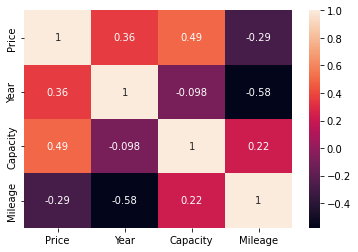

In [63]:
sns.heatmap(df.select_dtypes(exclude='object').corr(),annot=True)

We can see from the above heatmap that the Capacity feature is correlated well with price, maybe we can use that to engineer some new features. 

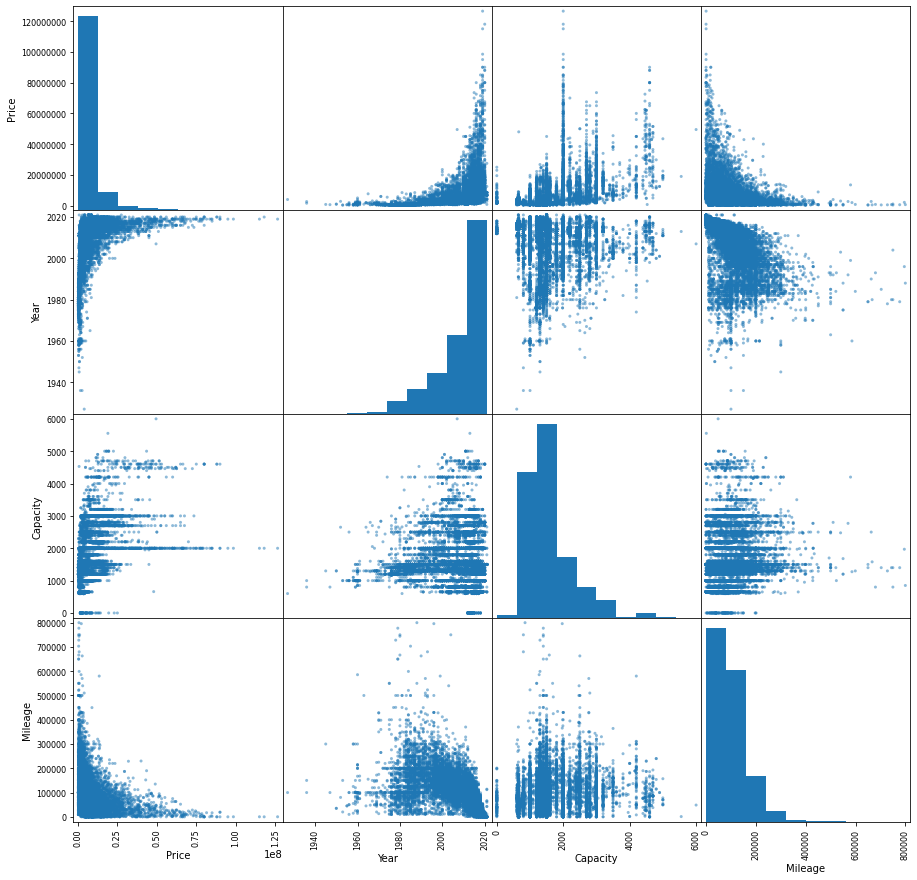

In [64]:
m = scatter_matrix(df, figsize=(15, 15))

In [65]:
df['MilCap'] = np.log2(1+(df["Mileage"]/df["Capacity"]))
df['LogMil'] = np.log2(df['Mileage']+ 1)
df['LogYear'] = np.log2(df['Year'])
df['LogCap'] = np.log2(df['Capacity'] + 1)
df['FeatureX'] = (np.log2(1 + df['Mileage']) - np.log2(df['Year']))/(np.log2(1 + df['Capacity']) + 1)

The Mileage with Mileage and Year with Year graphs look somewhat like a logarithm, we will use that function to create some new features.  

<AxesSubplot:>

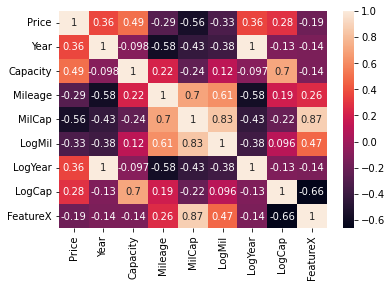

In [66]:
sns.heatmap(df.select_dtypes(exclude='object').corr(),annot=True)

We can now see how well the new features corrolate with the price. Most of them are not really helpfull, for example the LogYear feature has a huge corrolation with Year (which is to be expected). A feature that seams promising is MilCap, it seams to have a good corrolation with price, it does have a relatively high corrolation with Mileage which is not the best. The thought behind MilCap was that cars with a higher engine capacity usually drive longer distances, of course this is not always the case.

We will keep all our features for now to see that gets sellected in the model selection process.

<h1>Model Selection</h1>

We finaly got to the most exciting part! (At least in my opinion)

My main idea here is to fit multiple predictors and use the voting concept to combine them so that we can have one stong predictor.

In [67]:
features = ["Brand", "Model", "Year","Condition","Transmission","Body","Fuel","Capacity","Mileage"]
numeric_features = ["Year", "Capacity", "Mileage"]
nominal_features = ["Brand", "Model","Condition","Transmission","Body","Fuel"]

We will use shufflesplit because we have a good sized dataset. We will split the data set into 2 parts, one for training (80%) and one for test (20%). Furthermore we will split our training set into two parts, a validation set(20%) and final training set (60%), this is necessary for parameter tuning and preventing leakage.

In [68]:
# Split off the test set: 20% of the dataset.
dev_df, test_df = train_test_split(df, train_size=0.8, random_state=2)
# Create the object that shuffles and splits the dev data
# Why 0.75? Because 0.75 of 80% of the data is 20% of the original dataset.
ss = ShuffleSplit(n_splits=1, train_size=0.75, random_state=2)

In [69]:
# Extract the features but leave as a DataFrame
dev_X = dev_df[features]
test_X = test_df[features]

# Target values, converted to a 1D numpy array
dev_y = dev_df["Price"].values
test_y = test_df["Price"].values

We will now make our classes that introduce our new features.

In [70]:
class InsertMilCapRatio(BaseEstimator, TransformerMixin):

    def __init__(self, insert=True):
        self.insert = insert
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        if self.insert:
            X["milCap"] = np.log2(1 + (df["Mileage"]/(1 + df["Capacity"])))
            
    
            X = X.replace( [ np.inf, -np.inf ], np.nan )
        return X

In [71]:
class InsertLogMil(BaseEstimator, TransformerMixin):

    def __init__(self, insert=True):
        self.insert = insert
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        if self.insert:
            df['LogMil'] = np.log2(df['Mileage'] + 1)
            
    
            X = X.replace( [ np.inf, -np.inf ], np.nan )
        return X

In [72]:
class InsertLogYear(BaseEstimator, TransformerMixin):

    def __init__(self, insert=True):
        self.insert = insert
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        if self.insert:
            df['LogYear'] = np.log2(df['Year'])
            
    
            X = X.replace( [ np.inf, -np.inf ], np.nan )
        return X

In [73]:
class InsertLogCap(BaseEstimator, TransformerMixin):

    def __init__(self, insert=True):
        self.insert = insert
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        if self.insert:
            df['LogCap'] = np.log2(df['Capacity'] + 1)
            
    
            X = X.replace( [ np.inf, -np.inf ], np.nan )
        return X

In [74]:
class InsertFeatureX(BaseEstimator, TransformerMixin):

    def __init__(self, insert=True):
        self.insert = insert
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        if self.insert:
            df['FeatureX'] = (np.log2(1 + df['Mileage']) - np.log2(df['Year']))/(np.log2(1 + df['Capacity']) + 1)
            
    
            X = X.replace( [ np.inf, -np.inf ], np.nan )
        return X

We will also create a class so that we can use multiple scalers, this will help us when we will try to find the best combination of hyper parameters.

In [75]:
class TransformerFromHyperP(BaseEstimator, TransformerMixin):

    def __init__(self, transformer=None):
        self.transformer = transformer
        
    def fit(self, X, y=None):
        if self.transformer:
            self.transformer.fit(X, y)
        return self
    
    def transform(self, X, y=None):
        if self.transformer:
            return self.transformer.transform(X)
        else:
            return X

For our preprocessor, besides the custom features, we will also add an imputer just in case we have any nan's.
For encoding our non numerical features, we will use a One Hot Encoder.

In [76]:
preprocessor = ColumnTransformer([
        ("num", Pipeline([("MilCapRatio", InsertMilCapRatio()),
                          ("FeatureX", InsertFeatureX()),
                          ("LogMil", InsertLogMil()),
                          ("LogCap",InsertLogCap()),
                          ("LogYear",InsertLogYear()),
                          ("imputer", SimpleImputer(missing_values=np.nan, strategy="mean")),
                          ("scaler", TransformerFromHyperP())]),
         numeric_features),
                          
        ("nom", Pipeline([("imputer", SimpleImputer(missing_values=np.nan, strategy="most_frequent")), 
                          ("binarizer", OneHotEncoder(handle_unknown="ignore"))]), 
                nominal_features)],
        remainder="passthrough")

Now it is time to fit. I initially had more parameters in each model for fitting, however I left the ones that gave me the best results so that I don't use up to much time.

We will start with KNN. One thing that was observed, is that if we decress our neighbors we will start to over fit. An optimum number is around 5, this gives a delta between the training error and valadation error of around 100k.

In [77]:
# Create a pipeline that combines the preprocessor with kNN
knn = Pipeline([
    ("preprocessor", preprocessor),
    ("predictor", KNeighborsRegressor())])

# Create a dictionary of hyperparameters for kNN
knn_param_grid = {
                 "predictor__n_neighbors": [5],      # if we go lower we start to over fit
                 "preprocessor__num__scaler__transformer": [StandardScaler()],
                 "preprocessor__num__MilCapRatio__insert": [False],
                 "preprocessor__num__LogMil__insert": [True],
                 "preprocessor__num__FeatureX__insert": [True],
                 "preprocessor__num__LogCap__insert": [True],
                  "preprocessor__num__LogYear__insert" : [True]
                 }
                  

# Create the grid search object which will find the best hyperparameter values based on validation error
knn_gs = GridSearchCV(knn, knn_param_grid, scoring="neg_mean_absolute_error", cv=ss)

# Run grid search by calling fit
knn_gs.fit(dev_X, dev_y)

#save best model so that we have it for later for the voting regressor
knn_best = knn_gs.best_estimator_

# Let's see how well we did
print(knn_gs.best_params_)
print(knn_gs.best_score_)

# Let's check if we are underfitting, or overfitting (Initially I was over fitting, had a delta of around 400k )
knn.set_params(**knn_gs.best_params_) 
scores = cross_validate(knn, dev_X, dev_y, cv=ss, scoring="neg_mean_absolute_error", return_train_score=True)
print("Training error: ", np.mean(np.abs(scores["train_score"])))
print("Validation error: ", np.mean(np.abs(scores["test_score"])))

{'predictor__n_neighbors': 5, 'preprocessor__num__FeatureX__insert': True, 'preprocessor__num__LogCap__insert': True, 'preprocessor__num__LogMil__insert': True, 'preprocessor__num__LogYear__insert': True, 'preprocessor__num__MilCapRatio__insert': False, 'preprocessor__num__scaler__transformer': StandardScaler()}
-1011703.0404827207
Training error:  847004.0991131023
Validation error:  1011703.0404827207


Next we will use a Random Forest Regressor, this proved to be rather good, but was also very easy to overfit. 
A method to stop over fitting was to decrease the max depth of the tree. The initial value is +inf, so the tree will basically just memorise the whole data set, not good!

In [78]:
# Create a pipeline that combines the preprocessor with random forest
rf = Pipeline([
    ("preprocessor", preprocessor),
    ("predictor", RandomForestRegressor(max_depth = 10))])

# Create a dictionary of hyperparameters for lasso regression
rf_param_grid = {
                    "predictor__n_estimators": [100],
                    "preprocessor__num__scaler__transformer": [ MinMaxScaler()],
                    "preprocessor__num__MilCapRatio__insert": [False],
                    "preprocessor__num__FeatureX__insert": [True],
                    "preprocessor__num__LogMil__insert": [False],
                    "preprocessor__num__LogCap__insert": [True]
                }

# Create the grid search object which will find the best hyperparameter values based on validation error
rf_gs = GridSearchCV(rf, rf_param_grid, scoring="neg_mean_absolute_error", cv=ss)

# Run grid search by calling fit
rf_gs.fit(dev_X, dev_y)

#save best model
rf_best = rf_gs.best_estimator_

# Let's see how well we did
print(rf_gs.best_params_)
print(rf_gs.best_score_)

# Let's check if we are underfitting, or overfitting 
rf.set_params(**rf_gs.best_params_) 
scores = cross_validate(rf, dev_X, dev_y, cv=ss, scoring="neg_mean_absolute_error", return_train_score=True)
print("Training error: ", np.mean(np.abs(scores["train_score"])))
print("Validation error: ", np.mean(np.abs(scores["test_score"])))

{'predictor__n_estimators': 100, 'preprocessor__num__FeatureX__insert': True, 'preprocessor__num__LogCap__insert': True, 'preprocessor__num__LogMil__insert': False, 'preprocessor__num__MilCapRatio__insert': False, 'preprocessor__num__scaler__transformer': MinMaxScaler()}
-1021164.653960404
Training error:  872916.4846108784
Validation error:  1021212.3614838326


The following regressor, did not help much. It gave a pretty bad prediction and in the end made the voting regressor worse, so I decided to leave it out.

In [79]:
# Create a pipeline that combines the preprocessor with lasso regression
# lasso = Pipeline([
#     ("preprocessor", preprocessor),
#     ("predictor", SGDRegressor(penalty="l1", max_iter = 2500))])

# # Create a dictionary of hyperparameters for lasso regression
# lasso_param_grid = {"predictor__alpha": [40,45,50,55,60],
#                    "preprocessor__num__scaler__transformer": [ MinMaxScaler()],
#                     "preprocessor__num__MilCapRatio__insert": [True, False],
#                     "preprocessor__num__FeatureX__insert": [True, False],
#                     "preprocessor__num__LogMil__insert": [True, False],
#                     "preprocessor__num__LogCap__insert": [True, False]
#                    }

# # Create the grid search object which will find the best hyperparameter values based on validation error
# lasso_gs = GridSearchCV(lasso, lasso_param_grid, scoring="neg_mean_absolute_error", cv=ss)

# # Run grid search by calling fit
# lasso_gs.fit(dev_X, dev_y)

# #save best model
# lasso_best = lasso_gs.best_estimator_

# # Let's see how well we did
# print(lasso_gs.best_params_)
# print(lasso_gs.best_score_)

# # Let's check if we are underfitting, or overfitting 
# lasso.set_params(**lasso_gs.best_params_) 

# scores = cross_validate(lasso, dev_X, dev_y, cv=ss, scoring="neg_mean_absolute_error", return_train_score=True)
# print("Training error: ", np.mean(np.abs(scores["train_score"])))
# print("Validation error: ", np.mean(np.abs(scores["test_score"])))

Gradient Boosting Regressor initially seamed like it would do more harm then good, since it gave a larger error then KNN and Random Forests, however when put into the voting regressor it actually helped. It was also a bit tricky to get the correct hyperparameters so that we wouldn't over fit or under fit. In the end the number of estimators and the max depth proved to helpout with getting the fit just right.

In [80]:
# Create a pipeline that combines the preprocessor with GBR 
GBR = Pipeline([
    ("preprocessor", preprocessor),
    ("predictor", GradientBoostingRegressor())
   ])

# # Create a dictionary of hyperparameters for GBR
GBR_param_grid = {"predictor__n_estimators": [400],
                    "predictor__learning_rate" : [0.2],
                    "predictor__max_depth" : [3],
                    "preprocessor__num__scaler__transformer": [MinMaxScaler()],
                    "preprocessor__num__MilCapRatio__insert": [False],
                    "preprocessor__num__FeatureX__insert": [True],
                    "preprocessor__num__LogMil__insert": [True],
                    "preprocessor__num__LogCap__insert": [True]
                   }

# Create the grid search object which will find the best hyperparameter values based on validation error
GBR_gs = GridSearchCV(GBR, GBR_param_grid, scoring="neg_root_mean_squared_error", cv=ss)

# Run grid search by calling fit
GBR_gs.fit(dev_X, dev_y)

#save best model
GBR_best = GBR_gs.best_estimator_

# Let's see how well we did
print(GBR_gs.best_params_)
print(GBR_gs.best_score_)

# Let's check if we are underfitting, or overfitting 
GBR.set_params(**GBR_gs.best_params_) 

scores = cross_validate(GBR, dev_X, dev_y, cv=ss, scoring="neg_mean_absolute_error", return_train_score=True)
print("Training error: ", np.mean(np.abs(scores["train_score"])))
print("Validation error: ", np.mean(np.abs(scores["test_score"])))

{'predictor__learning_rate': 0.2, 'predictor__max_depth': 3, 'predictor__n_estimators': 400, 'preprocessor__num__FeatureX__insert': True, 'preprocessor__num__LogCap__insert': True, 'preprocessor__num__LogMil__insert': True, 'preprocessor__num__MilCapRatio__insert': False, 'preprocessor__num__scaler__transformer': MinMaxScaler()}
-1882781.2680231326
Training error:  811517.1811340871
Validation error:  925680.86521625


Now that we got our models, we will put them all into a voting regressor to create an ensable.

In [81]:
#create a dictionary of our models
estimators=[('rf',rf_best),('knn', knn_best),('gbr',GBR_best)] #,,,('lasso', lasso_best),

#create our voting classifier, inputting our models
ensemble = VotingRegressor(estimators)

We will now fit our regressor and see out error.

In [82]:
#fit model to training data
ensemble.fit(dev_X, dev_y)

#test our model on the test data
mean_absolute_error(dev_y, ensemble.predict(dev_X))

735407.4904156292

<h1>Final Score</h1>

Now that we got our final model. Lets see the error on the test set

In [83]:
#fit model to training data
ensemble.fit(dev_X, dev_y)
mean_absolute_error(test_y, ensemble.predict(test_X))

878044.4294438637

So the delta between the dev set and training set is around 130k (I hope that is good)

Now that we are satisfied with our model, it is time to train it on the whole data set.

In [84]:
ensemble.fit(df[features], df["Price"].values)

VotingRegressor(estimators=[('rf',
                             Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('num',
                                                                               Pipeline(steps=[('MilCapRatio',
                                                                                                InsertMilCapRatio(insert=False)),
                                                                                               ('FeatureX',
                                                                                                InsertFeatureX()),
                                                                                               ('LogMil',
                                                                                                InsertLogMil(insert=False)),
                                 

In [85]:
dump(ensemble, 'models/my_model.pkl')

['models/my_model.pkl']